# Nombres
-----------

* Martina Ainara Ferrante
* Tomás Mastantuono

In [238]:
import numpy as np
import matplotlib.pyplot as plt

# Tipos de órbitas


Para este trabajo, vamos a suponer un sistema formado por dos cuerpos 1 y 2 de masas m y M respectivamente, con M>>m, tal que $\vec r_{cm} = \vec r_1$, que vamos a tomar como nuestro origen ($\vec r_1 = 0$).

Y para simplificar la notación, llamamos $\vec r = \vec r_2$, y $r=\mid \vec r \mid $

Además, como ambos cuerpos están sometidos a la fuerza de atracción que se ejercen mutuamente, que cumple que $\vec F_{G12} = - \vec F_{G21}$, vale que $\sum F_{ext} = 0$, lo que nos permite decir que el CM es un sistema inercial. En este caso, podemos tomarlo como nuestro origen, y también veríamos que $\vec v_{cm}^{ cm}=0$.

Queremos ver cómo cambia la órbita del cuerpo 2 con distintas condiciones iniciales, en particular con distintas velocidades iniciales, dado un radio fijo.

Para nuestro trabajo, decidimos definir un radio inicial que sea un $x_0$ que mantendremos igual para todas las simulaciones, y nos iremos preguntando, ¿cuál es la velocidad en $\hat y$ que tenemos que darle al cuerpo 2 para que haga este tipo de órbita?

Para esto veamos qué magnitudes se conservan para el sistema que tiene al cuerpo 2:

$\vec L^{cm} = cte$ ya que $\vec F_{G21}$ no hace torque por ser una fuerza central,

y también vemos que $\Delta Em = 0$, ya que $\vec F_{G21}$ es una fuerza conservativa.

y como el $\vec L^{cm}$ se conserva, podemos relacionar:

$$\vec L_i^{cm} = \vec L_f^{cm}$$

$$\vec L_i^{cm} = m \vec r_o \times \vec v_o$$

$$\vec L_i^{cm} = m (r_o \hat r) \times (v_o \hat \theta)$$

$$\vec L_i^{cm} = mr_ov_o$$

Que vamos a llamar $Lo = mr_ov_o$

$$\vec L_f^{cm} = m \vec r \times \vec v = mr^2 \dot \theta $$

$$mr_ov_o = mr^2 \dot \theta$$

$$r \dot \theta  = \frac{Lo}{mr}$$

Y la energía podemos expresarla como:

$$E = \frac{1}{2} m (\dot r^2 + (r \dot \theta)^2) - \frac{GmM}{r}$$

Reemplazamos lo que obtuvimos anteriormente y obtenemos:

$$E = \frac{1}{2} m \dot r^2 + \frac{Lo^2}{2mr^2} - \frac{GmM}{r}$$

Con nuestra energía cinética siendo

$$K=\frac{1}{2}m \dot r^2$$

y lo que llamaremos "potencial efectivo":

$$Veff=\frac{Lo^2}{2mr^2} - \frac{GmM}{r}$$


In [239]:
dt = 0.00001
n_steps = 1000000

x = np.zeros(n_steps)
vx = np.zeros(n_steps)
acc_x = np.zeros(n_steps)

y = np.zeros(n_steps)
vy = np.zeros(n_steps)
acc_y = np.zeros(n_steps)

energia = np.zeros(n_steps)

In [240]:
mt = 100
m = 1
G = 10

## Potencial Efectivo

In [241]:
x[0] = 10
vy[0] = 15

In [242]:
for i in range(1, n_steps):
    x[i] = x[i-1] + vx[i-1]*dt
    vx[i] = vx[i-1] + acc_x[i-1]*dt
    acc_x[i] = -G*mt*x[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)

    y[i] = y[i-1] + vy[i-1]*dt
    vy[i] = vy[i-1] + acc_y[i-1]*dt
    acc_y[i] = -G*mt*y[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)


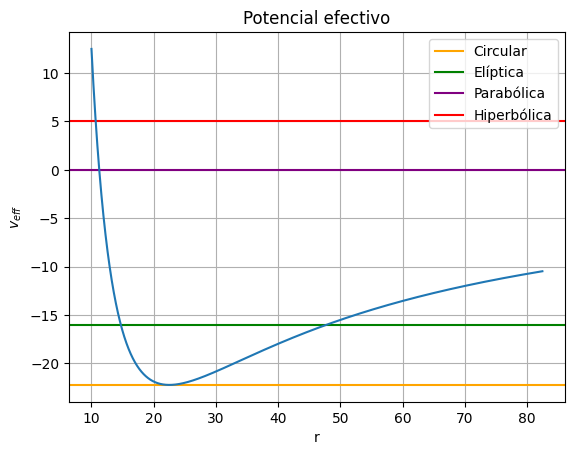

In [243]:
Veff = ((m * (x[0]**2) * (vy[0]**2)) / (2*(x**2 + y**2))) - ((G*m*mt) / ((x**2 + y**2)**(1/2)))
r = (x**2 + y**2)**(1/2)

e1 = -(G**2 *m * mt**2)/(2*x[0]**2 * vy[0]**2)
e2 = -16
e3 = 0
e4 = 5

plt.axhline(e1, c='orange', label='Circular')
plt.axhline(e2, c='green', label='Elíptica')
plt.axhline(e3, c='purple', label='Parabólica')
plt.axhline(e4, c='red', label='Hiperbólica')
plt.plot(r, Veff)

plt.title('Potencial efectivo')
plt.ylabel(r'$v_{eff}$')
plt.xlabel('r')

plt.legend(loc='upper right')
plt.grid()
plt.show()

##   Órbita Circular

Para calcular la velocidad en $ \hat y $ inicial que tenemos que darle a m para que orbite al planeta M de manera circular, necesitamos calcular el mínimo del Veff. Básicamente, para que la órbita tenga forma circular es necesario darle a m una energia inical que coincida con el potencial efectivo mínimo. Para eso, como ya tenemos el Veff y la posición en x inicial la mantenemos fija, calculamos la derivada del potencial efectivo con respecto a la posición para despejar un valor para la velocidad inicial:

$$Veff = \frac{Lo^2}{2mr^2} - \frac{GmM}{r}$$

Y tenemos que $$Lo = m (r_0 \hat r)\times(v_0 \hat \theta )$$
$$Lo=mr_0v_0$$

Derivando el Veff con respecto a r queda:

$$\frac {\partial Veff }{ \partial r}  = -\frac{mr_0^2v_0^2}{r^3} + \frac{GmM}{r^2} $$

Y como el minimo del potencial efectivo nos da un punto de equilibro, cuando evaluemos en ese punto obtendremos que la expresión es igual a cero

$$\frac {\partial Veff }{ \partial r} \bigg\rvert_{r_0}  = 0$$

Entonces,

$$ 0 = -\frac{mr_0^2v_0^2}{r_0^3} + \frac{GmM}{r_0^2} $$

$$ \frac{mv_0^2}{r_0} = \frac{GmM}{r_0^2}$$

Despejamos $v_0$,

$$v_0^2 = \frac{GM}{r_0}$$

Y como solo le damos velocidad en $ \hat y$, esta es la velocidad inicial que tenemos que darle a m en $\hat y$ para que orbite circularmente al planeta M.

Y además, usamos que $r_0 = \sqrt{x_0^2}$ ya que $y_0 = 0$ y con el $x_0$ elegido, que es un número positivo, podemos decir que $r_0=x_0$

Condiciones iniciales

In [244]:
x[0] = 10
vx[0] = 0
acc_x[0] = -(G * mt * x[0])/(x[0]**2)**(3/2)

y[0] = 0
vy[0] = ((G*mt)/(x[0]))**(1/2)
acc_y[0] = 0

energia[0] = 1/2 * m * (vy[0])**2 - (G * m * mt) / (x[0]**2 + y[0]**2)**(1/2)

Simulación

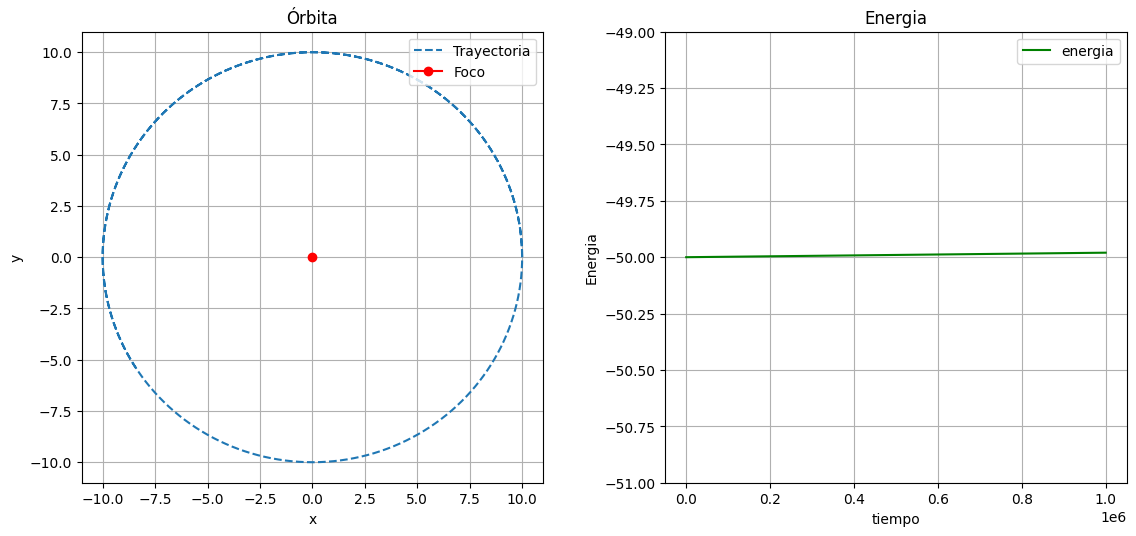

In [245]:
for i in range(1, n_steps):
    x[i] = x[i-1] + vx[i-1]*dt
    vx[i] = vx[i-1] + acc_x[i-1]*dt
    acc_x[i] = -G*mt*x[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)

    y[i] = y[i-1] + vy[i-1]*dt
    vy[i] = vy[i-1] + acc_y[i-1]*dt
    acc_y[i] = -G*mt*y[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)
    energia[i] = 1/2 * m * (vx[i-1]**2 + vy[i-1]**2) - (G * m * mt) / (x[i-1]**2 + y[i-1]**2)**(1/2)

#Guardamos los datos
x_cir = x.copy()
y_cir = y.copy()

#Graficos
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].plot(x, y, marker=None, linestyle='--', label='Trayectoria')
axs[0].plot(0, 0, marker='o', color='red', label='Foco')
axs[0].set(xlabel='x', ylabel='y', title='Órbita')
axs[0].grid()
axs[0].legend(loc='upper right')

axs[1].plot(energia, label='energia', linestyle='-', color='green')
axs[1].set(ylabel='Energia', xlabel='tiempo', title='Energia', ylim=(-51, -49))
axs[1].grid()
axs[1].legend()

plt.tight_layout(pad=3)
plt.show()

## Órbita Elíptica

Para obtener una órbita de forma elíptica, tenemos que darle a m una energía inicial menor que cero, pero que no sea exactamente el mínimo valor de esta (este es el caso de la órbita circular).

Condiciones iniciales

In [246]:
x[0] = 10
vx[0] = 0
acc_x[0] = -(G * mt * x[0])/(x[0]**2)**(3/2)

y[0] = 0
vy[0] = 11.25
acc_y[0] = 0

energia[0] = 1/2 * m * (vy[0])**2 - (G * m * mt) / (x[0]**2 + y[0]**2)**(1/2)

Simulacion

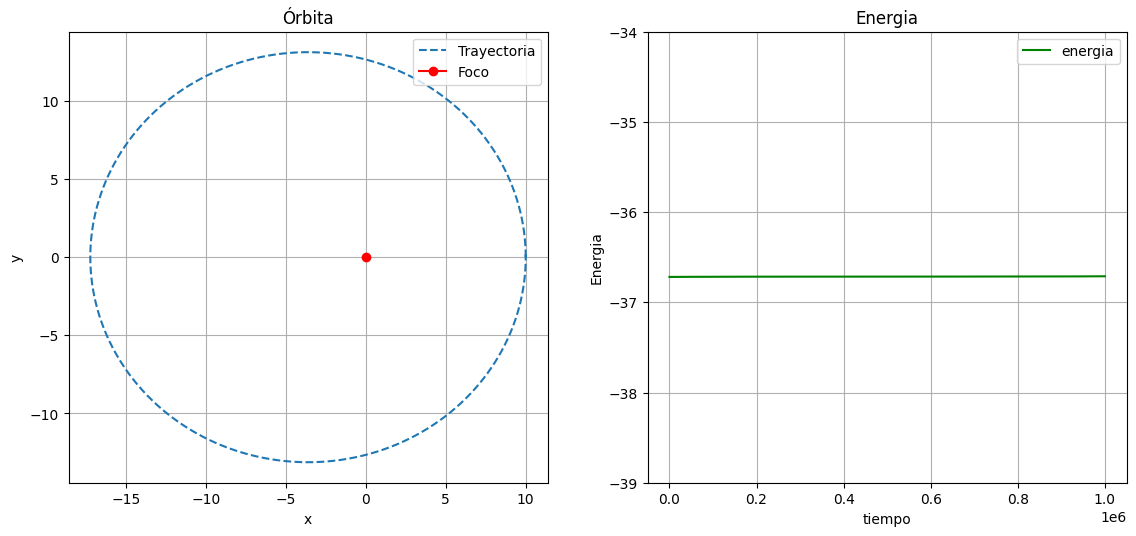

In [247]:
for i in range(1, n_steps):
    x[i] = x[i-1] + vx[i-1]*dt
    vx[i] = vx[i-1] + acc_x[i-1]*dt
    acc_x[i] = -G*mt*x[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)

    y[i] = y[i-1] + vy[i-1]*dt
    vy[i] = vy[i-1] + acc_y[i-1]*dt
    acc_y[i] = -G*mt*y[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)
    energia[i] = 1/2 * m * (vx[i-1]**2 + vy[i-1]**2) - (G * m * mt) / (x[i-1]**2 + y[i-1]**2)**(1/2)

#Guardamos los datos
x_el = x.copy()
y_el = y.copy()

#Graficos
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].plot(x, y, marker=None, linestyle='--', label='Trayectoria')
axs[0].plot(0, 0, marker='o', color='red', label='Foco')
axs[0].set(xlabel='x', ylabel='y', title='Órbita')
axs[0].grid()
axs[0].legend(loc='upper right')

axs[1].plot(energia, label='energia', linestyle='-', color='green')
axs[1].set(ylabel='Energia', xlabel='tiempo', title='Energia', ylim=(-39, -34))
axs[1].grid()
axs[1].legend()

plt.tight_layout(pad=3)
plt.show()

## Órbita Parabólica

En este caso, era necesario darle a m una energia inicial igual a 0, y podemos averiguar cual es la velocidad en $\hat y$ que tenemos que darle despejando de la expresión que teníamos para la energía:

$$E= \frac{1}{2} m \dot r + \frac{Lo^2}{2mr^2} - \frac{GmM}{r}$$

Lo que tenemos que darle es una energía inicial igual a cero,

$$E_0 = 0 = \frac{1}{2} m \dot r + \frac{Lo^2}{2mr^2} - \frac{GmM}{r}$$

Y no tenemos $\dot r_0$ ya que toda la velocidad inicial que le damos a m está en $\hat y$
Sabiendo eso y reemplazando que $Lo = m x_0 v_{y_0}$ obtenemos:

$$ 0 = \frac{m^2 x_0^2 v_{y_0}^2}{2mr_0^2} - \frac{GmM}{r_0}$$

Considerando que $r_0 = \sqrt{x_0^2}$ ya que $y_0 = 0$ y con el $x_0$ elegido, que es un número positivo, podemos decir que $r_0=x_0$

$$ \frac{GmM}{r_0} = \frac{m v_{y_0}^2}{2} $$

Y finalmente obtenemos:

$$v_{y_0}^2 = \frac{2GM}{r_0}$$

Condiciones iniciales

In [248]:
x[0] = 10
vx[0] = 0
acc_x[0] = -(G * mt * x[0])/(x[0]**2)**(3/2)

y[0] = 0
vy[0] = ((2*G*mt)/(x[0]))**(1/2)
acc_y[0] = 0

energia[0] = 1/2 * m * (vy[0])**2 - (G * m * mt) / (x[0]**2 + y[0]**2)**(1/2)

Simulación

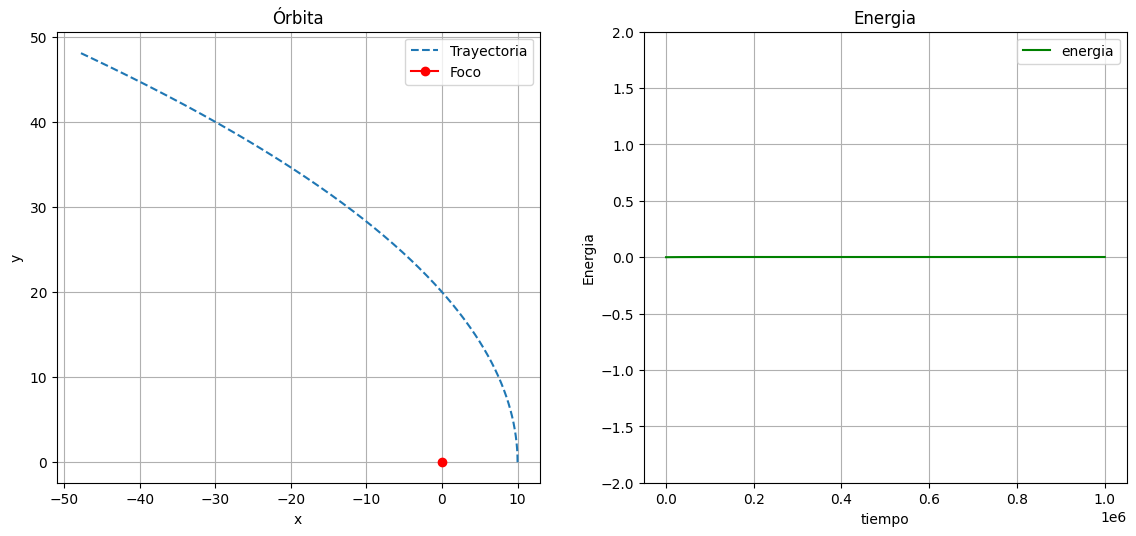

In [249]:
for i in range(1, n_steps):
    x[i] = x[i-1] + vx[i-1]*dt
    vx[i] = vx[i-1] + acc_x[i-1]*dt
    acc_x[i] = -G*mt*x[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)

    y[i] = y[i-1] + vy[i-1]*dt
    vy[i] = vy[i-1] + acc_y[i-1]*dt
    acc_y[i] = -G*mt*y[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)
    energia[i] = 1/2 * m * (vx[i-1]**2 + vy[i-1]**2) - (G * m * mt) / (x[i-1]**2 + y[i-1]**2)**(1/2)

#Guardamos los datos
x_par = x.copy()
y_par = y.copy()

#Graficos
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].plot(x, y, marker=None, linestyle='--', label='Trayectoria')
axs[0].plot(0, 0, marker='o', color='red', label='Foco')
axs[0].set(xlabel='x', ylabel='y', title='Órbita')
axs[0].grid()
axs[0].legend(loc='upper right')

axs[1].plot(energia, label='energia', linestyle='-', color='green')
axs[1].set(ylabel='Energia', xlabel='tiempo', title='Energia', ylim=(-2, 2))
axs[1].grid()
axs[1].legend()

plt.tight_layout(pad=3)
plt.show()

## Órbita Hiperbólica

Para obtener una órbita hiperbólica, basta con darle a m una energía inicial mayor a cero.

Condiciones iniciales

In [250]:
x[0] = 10
vx[0] = 0
acc_x[0] = -(G * mt * x[0])/(x[0]**2)**(3/2)

y[0] = 0
vy[0] = 17
acc_y[0] = 0

energia[0] = 1/2 * m * (vy[0])**2 - (G * m * mt) / (x[0]**2 + y[0]**2)**(1/2)

Simulación

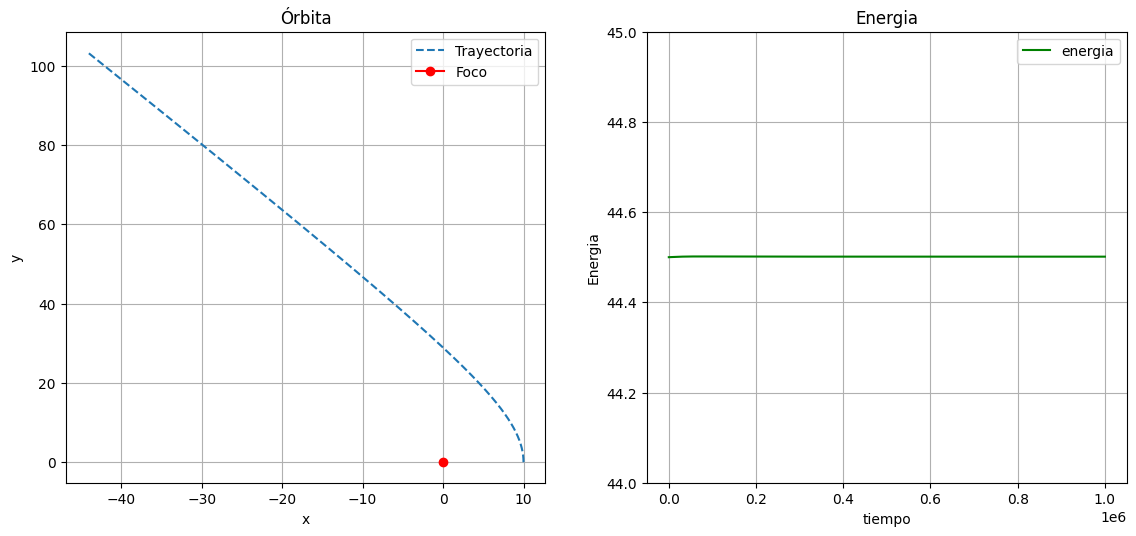

In [251]:
for i in range(1, n_steps):
    x[i] = x[i-1] + vx[i-1]*dt
    vx[i] = vx[i-1] + acc_x[i-1]*dt
    acc_x[i] = -G*mt*x[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)

    y[i] = y[i-1] + vy[i-1]*dt
    vy[i] = vy[i-1] + acc_y[i-1]*dt
    acc_y[i] = -G*mt*y[i-1] / (x[i-1]**2 + y[i-1]**2)**(3/2)
    energia[i] = 1/2 * m * (vx[i-1]**2 + vy[i-1]**2) - (G * m * mt) / (x[i-1]**2 + y[i-1]**2)**(1/2)

#Guardamos los datos
x_hip = x.copy()
y_hip = y.copy()

#Graficos
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].plot(x, y, marker=None, linestyle='--', label='Trayectoria')
axs[0].plot(0, 0, marker='o', color='red', label='Foco')
axs[0].set(xlabel='x', ylabel='y', title='Órbita')
axs[0].grid()
axs[0].legend(loc='upper right')

axs[1].plot(energia, label='energia', linestyle='-', color='green')
axs[1].set(ylabel='Energia', xlabel='tiempo', title='Energia', ylim=(44, 45))
axs[1].grid()
axs[1].legend()

plt.tight_layout(pad=3)
plt.show()

## Todas las órbitas juntas

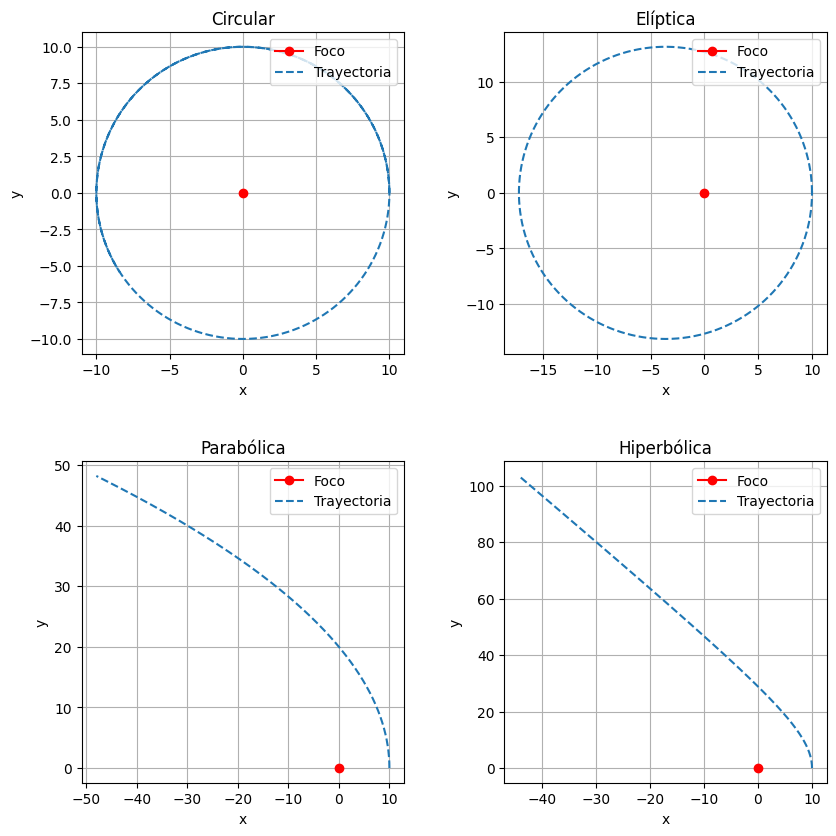

In [274]:
fig, axs = plt.subplots(2,2, figsize=(9,9))

#Colocamos los focos
axs[0,0].plot(0,0, color='red', marker='o', linestyle=None, label='Foco')
axs[0,1].plot(0,0, color='red', marker='o', linestyle=None, label='Foco')
axs[1,0].plot(0,0, color='red', marker='o', linestyle=None, label='Foco')
axs[1,1].plot(0,0, color='red', marker='o', linestyle=None, label='Foco')

#Graficos
axs[0,0].plot(x_cir, y_cir, linestyle='--', label='Trayectoria')
axs[0,0].set(xlabel='x', ylabel='y', title='Circular')
axs[0,0].legend(loc='upper right')
axs[0,0].grid()

axs[0,1].plot(x_el, y_el, linestyle='--', label='Trayectoria')
axs[0,1].set(xlabel='x', ylabel='y', title='Elíptica')
axs[0,1].legend(loc='upper right')
axs[0,1].grid()

axs[1,0].plot(x_par, y_par, linestyle='--', label='Trayectoria')
axs[1,0].set(xlabel='x', ylabel='y', title='Parabólica')
axs[1,0].legend(loc='upper right')
axs[1,0].grid()

axs[1,1].plot(x_hip, y_hip, linestyle='--', label='Trayectoria')
axs[1,1].set(xlabel='x', ylabel='y', title='Hiperbólica')
axs[1,1].legend(loc='upper right')
axs[1,1].grid()

plt.tight_layout(pad=3)
plt.show()